In [1]:
from itertools import starmap

species_values = {'A':6, 'B': 2, 'C': 6}
eqs = {'D': lambda x,y: x ** y, 'E': lambda x: x ** 8}
to_solve = {'D': ['A', 'B'], 'E': ['C']}

values_list = [[[species_values[value] for value in list]] for list in list(to_solve.values())]
eqs_list = list(eqs.values())

ultramap = [list(starmap(eqs_list[i], values_list[i])) for i in range(len(list(eqs.keys())))]

In [2]:
from itertools import starmap

species_values = {'A':6, 'B': 2, 'C': 6}
eqs = {'D': lambda x,y: x ** y, 'E': lambda x: x ** 8}
to_solve = {'D': ['A', 'B'], 'E': ['C']}

values_list = [[[species_values[value] for value in list]] for list in list(to_solve.values())]
eqs_list = list(eqs.values())

ultramap = [list(starmap(eqs_list[i], values_list[i])) for i in range(len(list(eqs.keys())))]
print(ultramap)

[[36], [1679616]]


In [3]:
a = [[1, 2],[2, 3]]

[print(i,v) for i,v in a]

1 2
2 3


[None, None]

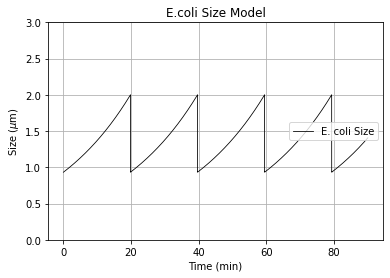

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def bacteria_size(birth_size=1, division_time=18, tmax=10, dt=0.01, division_size=2.0): # sb: micrometros | dt: min
    size_storage = []
    time_storage = []
    time = 0
    counter = 0

    while counter < tmax:

        mu = np.log(2)/division_time
        size = birth_size * np.exp(mu*time)
        reference_tau = 1/mu * np.log(division_size/birth_size)

        size_storage.append(size)
        time_storage.append(counter)

        if size >= division_size:
            time = 0

        elif size < division_size:
            time += dt

        counter += dt
    return time_storage, size_storage

div_s = 2
sb = np.random.normal(loc=div_s/2, scale=0.1*(div_s/2))


time, size = bacteria_size(birth_size=sb,tmax=90) 
plt.plot(time, size, lw=0.8, color='k', label='E. coli Size') 
plt.grid(True)

plt.legend(loc=5)

plt.xlabel('Time (min)')
plt.ylabel(r'Size (${\mu}$m)')
plt.ylim(0, 3)

plt.title('E.coli Size Model')


def bacteria_size_2(birth_size=1, division_time=18, tmax=10, dt=0.01, division_size=2.0): # sb: micrometros | dt: min
    size_storage = []
    time_storage = []
    time = 0
    counter = 0

    while counter < tmax:

        mu = np.log(2)/division_time
        size = birth_size * np.exp(mu*time)
        reference_tau = 1/mu * np.log(division_size/birth_size)

        size_storage.append(size)
        time_storage.append(counter)

        if size >= division_size:
            time = 0

        elif size < division_size:
            time += dt

        counter += dt
    return time_storage, size_storage

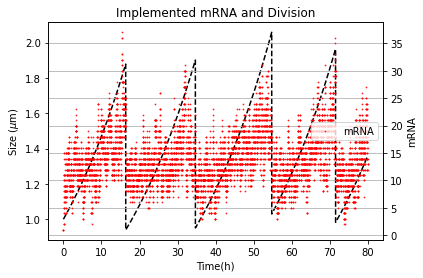

In [5]:

def simulate_division(birth_size=1, division_time=18, tmax=80, dt=0.01, division_size=2.0, mRNA=1, mRNA_c=100, mRNA_d=10):
    
    size_storage = []
    mRNA_array = []
    time_storage = []

    current_time = 0            # Tiempo actual de la simulación
    reference_time = 0          # Tiempo de referencia para el próximo muestreo
    reference_division_time = 0 # Tiempo en el que ocurre la división

    mu = np.log(2)/division_time
    reference_division_time = (1/mu) * np.log(((division_size + np.random.normal(loc=0, scale=0.1))/birth_size))
    size = birth_size 

    while current_time < tmax:

        if mRNA == 0:

            mRNA_synth = (1/mu) * np.log(1 - (mu * np.log(np.random.rand())/(mRNA_c * size)))

            tau = np.min([mRNA_synth, reference_division_time])
            q = np.argmin([mRNA_synth, reference_division_time])
        
        elif mRNA > 0:
                
            mRNA_synth = (1/mu) * np.log(1 - (mu * np.log(np.random.rand())/(mRNA_c * size)))
            mRNA_deg = -(1/(mRNA_d * mRNA)) * np.log(np.random.rand())

            tau = np.min([mRNA_synth,mRNA_deg, reference_division_time])
            q = np.argmin([mRNA_synth,mRNA_deg, reference_division_time])

        if current_time + tau < reference_time:
            size *= np.exp(mu*tau)

            if q == 0:
                mRNA += 1

            elif q == 1:
                mRNA -= 1
            
            elif q == 2:
                size /= 2
                reference_division_time = (1/mu) * np.log((division_size + np.random.normal(loc=0, scale=0.1))/size)
                mRNA = np.random.binomial(mRNA, 0.5)

            if q != 2:
                reference_division_time -= tau

            current_time += tau
            
            
        elif current_time + tau > reference_time:
            reference_division_time -= (reference_time - current_time)
            size *= np.exp(mu * (reference_time - current_time))

            current_time = reference_time  

            time_storage.append(current_time)
            size_storage.append(size)
            mRNA_array.append(mRNA)

            reference_time += dt
            
            

    fig, ax1 = plt.subplots()

    ax2 = ax1.twinx()
    ax1.plot(time_storage,size_storage, '--',color='black', linewidth=1.5, label='size')
    ax2.plot(time_storage,mRNA_array,'ro', alpha=0.8, linewidth=0.5, ms=0.8, label='mRNA')

    ax1.set_xlabel('Time(h)')
    ax1.set_ylabel(r'Size (${\mu}$m)')
    ax2.set_ylabel('mRNA')
    plt.title('Implemented mRNA and Division')
    ax2.grid()
    plt.legend(loc=5)


simulate_division()

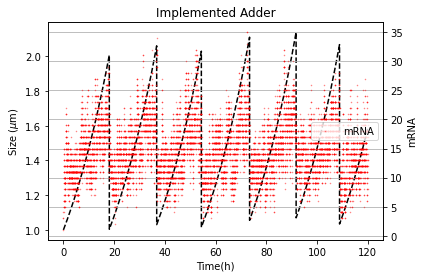

In [6]:
def simulate_adder(birth_size=1, division_time=18, tmax=120, dt=0.01, division_size=2.0, mRNA=1, mRNA_c=100, mRNA_d=10):
    
    size_storage = []
    mRNA_array = []
    time_storage = []

    current_time = 0            # Tiempo actual de la simulación
    reference_time = 0          # Tiempo de referencia para el próximo muestreo
    reference_division_time = 0 # Tiempo en el que ocurre la división

    mu = np.log(2)/division_time
    reference_division_time = (1/mu) * np.log(((birth_size + np.random.normal(loc=1, scale=0.05))/birth_size))
    size = birth_size 

    while current_time < tmax:

        if mRNA == 0:

            mRNA_synth = (1/mu) * np.log(1 - (mu * np.log(np.random.rand())/(mRNA_c * size)))

            tau = np.min([mRNA_synth, reference_division_time])
            q = np.argmin([mRNA_synth, reference_division_time])
        
        elif mRNA > 0:
                
            mRNA_synth = (1/mu) * np.log(1 - (mu * np.log(np.random.rand())/(mRNA_c * size)))
            mRNA_deg = -(1/(mRNA_d * mRNA)) * np.log(np.random.rand())

            tau = np.min([mRNA_synth,mRNA_deg, reference_division_time])
            q = np.argmin([mRNA_synth,mRNA_deg, reference_division_time])

        if current_time + tau < reference_time:
            size *= np.exp(mu*tau)

            if q == 0:
                mRNA += 1

            elif q == 1:
                mRNA -= 1
            
            elif q == 2:
                size /= 2
                reference_division_time = (1/mu) * np.log((size + np.random.normal(loc=1, scale=0.05))/size)
                mRNA = np.random.binomial(mRNA, 0.5)

            if q != 2:
                reference_division_time -= tau

            current_time += tau
            
            
        elif current_time + tau > reference_time:
            reference_division_time -= (reference_time - current_time)
            size *= np.exp(mu * (reference_time - current_time))

            current_time = reference_time  

            time_storage.append(current_time)
            size_storage.append(size)
            mRNA_array.append(mRNA)

            reference_time += dt
            
            

    fig, ax1 = plt.subplots()

    ax2 = ax1.twinx()
    ax1.plot(time_storage,size_storage, '--',color='black', linewidth=1.5, label='size')
    ax2.plot(time_storage,mRNA_array,'ro', alpha=0.5, linewidth=0.5, ms=0.5, label='mRNA')

    ax1.set_xlabel('Time(h)')
    ax1.set_ylabel(r'Size (${\mu}$m)')
    ax2.set_ylabel('mRNA')
    plt.title('Implemented Adder')
    ax2.grid()
    plt.legend(loc=5)


simulate_adder()

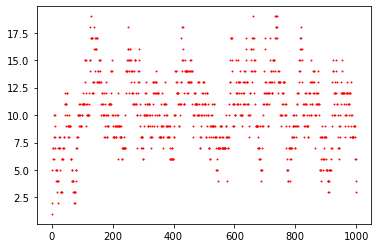

In [9]:
def simulate_mRNA(mRNA=1, mRNA_c=100, mRNA_d=10, sampling_time=0.01, tmax=10):

    time_array = []
    mRNA_array = []

    current_time = 0
    reference_time = 0

    while current_time < tmax:

        mRNA_synth = -(1/mRNA_c) * np.log(np.random.rand())
        mRNA_deg = -(1/(mRNA_d * mRNA)) * np.log(np.random.rand())

        tau = np.min([mRNA_synth,mRNA_deg])
        q = np.argmin([mRNA_synth,mRNA_deg])

            
        if current_time + tau < reference_time:

            if q == 0:
                mRNA += 1

            elif q == 1:
                mRNA -= 1

            current_time += tau
        else:
            current_time = reference_time  

            time_array.append(current_time)
            mRNA_array.append(mRNA)

            reference_time += sampling_time 

    plt.plot(mRNA_array, 'ro', ms=0.9)

simulate_mRNA()

In [10]:
reac = {'A': ['a', 'b'], 'B': ['c', 'd'], 'C': ['e', 'f']}

fic = {'A': {'create': 'f'}, 'B': {'create': 'z'}, 'C': {'destroy': 'k'}}

storage = {'create': [], 'destroy':[],'activate': [],'deactivate': [] ,'burst': []}

for key, value in fic.items():
    for reaction in storage.keys():
        storage['create'].append(reac[key])     if 'create'     in list(value.keys()) else storage['create'].append(None)
        storage['destroy'].append(reac[key])    if 'destroy'    in list(value.keys()) else storage['destroy'].append(None)
        storage['activate'].append(reac[key])   if 'activate'   in list(value.keys()) else storage['activate'].append(None)
        storage['deactivate'].append(reac[key]) if 'deactivate' in list(value.keys()) else storage['deactivate'].append(None)
        storage['burst'].append(reac[key])      if 'burst'      in list(value.keys()) else storage['burst'].append(None)

        {storage[k].remove(None) for k,v in storage.items() if None in storage[k]}

print(storage)



{'create': [['a', 'b'], ['a', 'b'], ['a', 'b'], ['a', 'b'], ['a', 'b'], ['c', 'd'], ['c', 'd'], ['c', 'd'], ['c', 'd'], ['c', 'd']], 'destroy': [['e', 'f'], ['e', 'f'], ['e', 'f'], ['e', 'f'], ['e', 'f']], 'activate': [], 'deactivate': [], 'burst': []}


In [12]:
reac = {'A': ['a', 'b'], 'B': ['c', 'd'], 'C': ['e', 'f']}

fic = {'A': {'create': 'f'}, 'B': {'create': 'z'}, 'C': {'destroy': 'k'}}

storage = {'create': [], 'destroy':[],'activate': [],'deactivate': [] ,'burst': []}

for key, value in fic.items():
    for reaction in storage.keys():
        storage[reaction].append(reac[key]) if reaction in list(value.keys()) else storage[reaction].append(None)
        {storage[k].remove(None) for k in storage.keys() if None in storage[k]}

print(storage)

# reactions_values = {key_storage_reactions[i]:self.reactions[list_of_reactions[i][k]] for i in range(len(list_of_reactions)) for k in range(len(list_of_reactions[i]))}

{'create': [['a', 'b'], ['c', 'd']], 'destroy': [['e', 'f']], 'activate': [], 'deactivate': [], 'burst': []}
